<a href="https://colab.research.google.com/github/TracyWang0110/Machine-learning-projects/blob/main/01_Conversion_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report

In [ ]:
data=pd.read_csv("https://drive.google.com/uc?export=download&id=1LU5be_H1TD2Pp1OmI202to3YyKo9AzFY")

Load Dataset


In [ ]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [ ]:
data.describe(include ='all')

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [ ]:
data.value_counts('country')

country
US         178092
China       76602
UK          48450
Germany     13056
dtype: int64

the site is probably a US site, although it does have a large Chinese user base as well user base is pretty young
conversion rate at around 3% is industry standard. It makes sense.
everything seems to make sense here except for max age 123 yrs! Let’s investigate it:

In [ ]:
data[data['age']>90]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


Those 123 and 111 values seem unrealistic. How many users are we talking about:
It is just 2 users! In this case, we can remove them, nothing will change. In general, depending on the problem, you can:
remove the entire row saying you don’t trust the data treat those values as NAs
if there is a pattern, try to figure out what went wrong.

In doubt, always go with removing the row. It is the safest choice.
You probably also want to emphasize in the text that wrong data is worrisome and can be an indicator of some bug in the logging code. Therefore, you’d like to talk to the software engineer who implemented the code to see if, perhaps, there are some bugs which affect the data significantly.

Anyway, here is probably just users who put wrong data. So let’s remove them:


Remove Outliers

In [ ]:
data = data[data['age']<90]

Exploratory Data Analysis

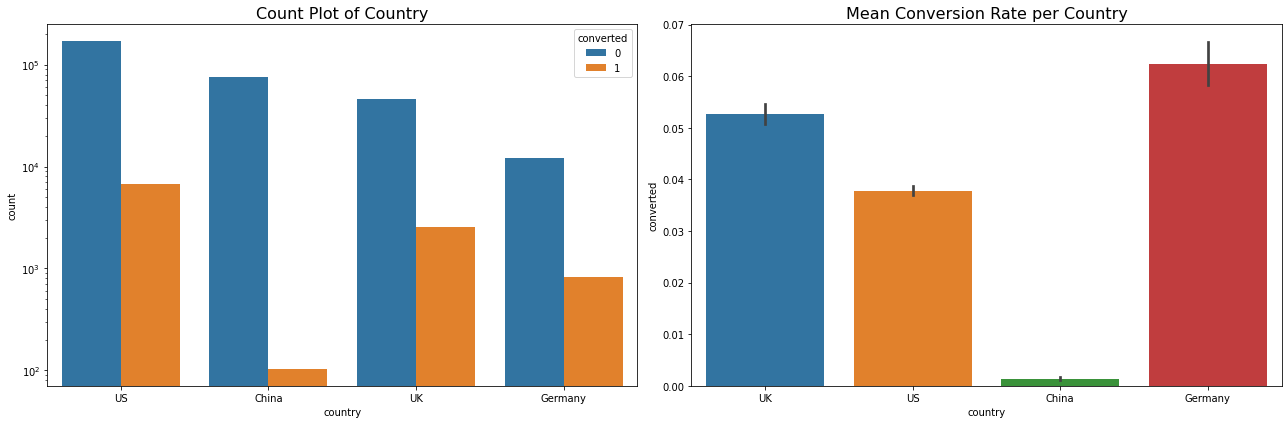

In [ ]:
# visualization of different countries 

#grouped = data[['country','converted']].groupby('country').mean()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', data=data, ax=ax[0], hue = 'converted',order = data['country'].value_counts().index)
ax[0].set_title('Count Plot of Country', fontsize=16)
#set up y scales
ax[0].set_yscale('log')

sns.barplot('country',y='converted',data=data,ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Country', fontsize =16)

plt.tight_layout()
plt.show()


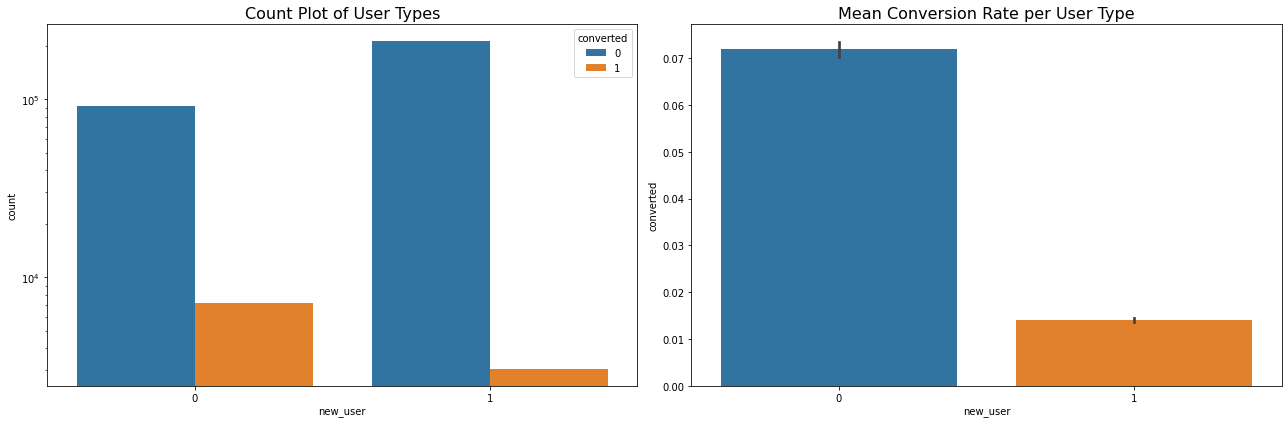

In [ ]:
# visualization of different user types

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='new_user', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of User Types', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='new_user', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per User Type', fontsize=16)
plt.tight_layout()
plt.show()

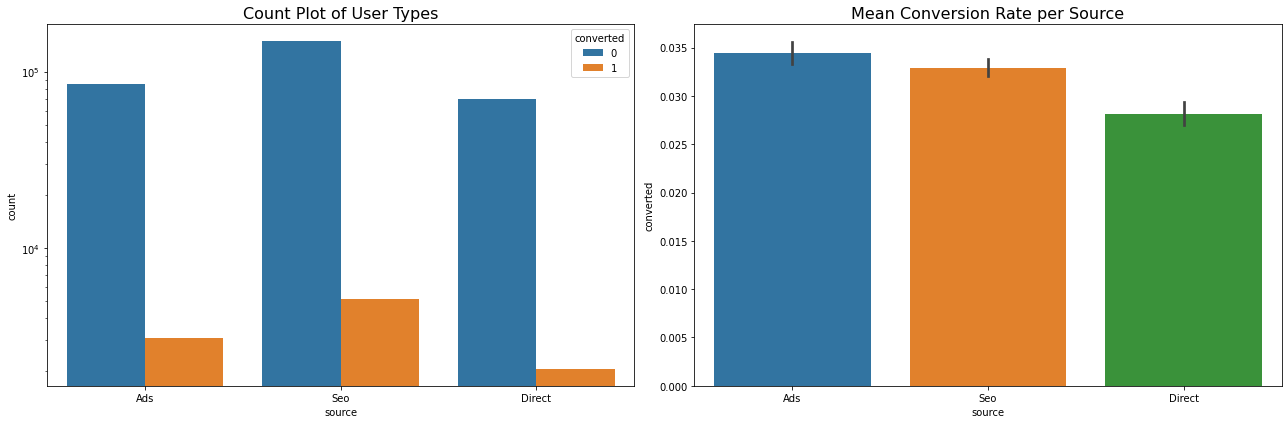

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of User Types', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='source', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Source', fontsize=16)
plt.tight_layout()
plt.show()

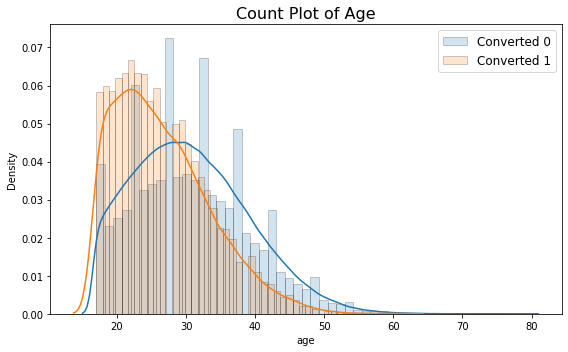

In [ ]:
#age

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
# visualization of height and female
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(data[data['converted']== 0]['age'], label='Converted 0', ax=ax, hist_kws=hist_kws)
sns.distplot(data[data['converted']== 1]['age'], label='Converted 1', ax=ax, hist_kws=hist_kws)
ax.legend(fontsize=12)
ax.set_title('Count Plot of Age', fontsize = 16)
plt.tight_layout()
plt.show()

In [ ]:
grouped_age = data.groupby('age').mean().reset_index()

In [ ]:
grouped_age.head()

,age,new_user,total_pages_visited,converted
0,17,0.667500,5.317362,0.071607
1,18,0.672336,5.184266,0.066029
2,19,0.675794,5.108996,0.058616
3,20,0.675266,5.129874,0.057109
4,21,0.679920,5.068028,0.053985


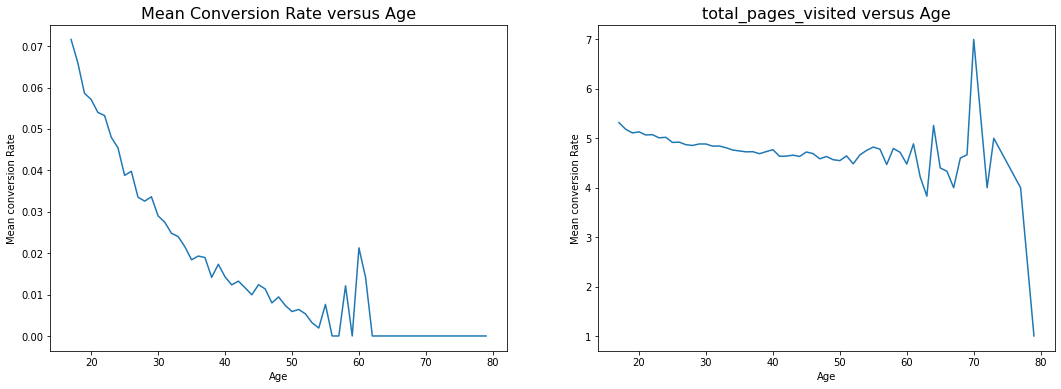

In [ ]:
#mean convertion rate by age and total_pages_visited
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

ax[0].plot(grouped_age['age'],grouped_age['converted'])
ax[0].set_title('Mean Conversion Rate versus Age', fontsize = 16)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Mean conversion Rate')


ax[1].plot(grouped_age['age'],grouped_age['total_pages_visited'])
ax[1].set_title('total_pages_visited versus Age', fontsize = 16)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Mean total pages visited')


plt.show()


In [ ]:
grouped_pages = data.groupby('total_pages_visited').mean().reset_index()

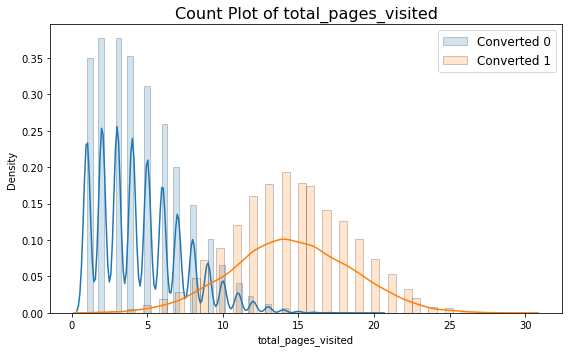

In [ ]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
# visualization of height and female
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(data[data['converted']== 0]['total_pages_visited'], label='Converted 0', ax=ax, hist_kws=hist_kws)
sns.distplot(data[data['converted']== 1]['total_pages_visited'], label='Converted 1', ax=ax, hist_kws=hist_kws)
ax.legend(fontsize=12)
ax.set_title('Count Plot of total_pages_visited', fontsize = 16)
plt.tight_layout()
plt.show()

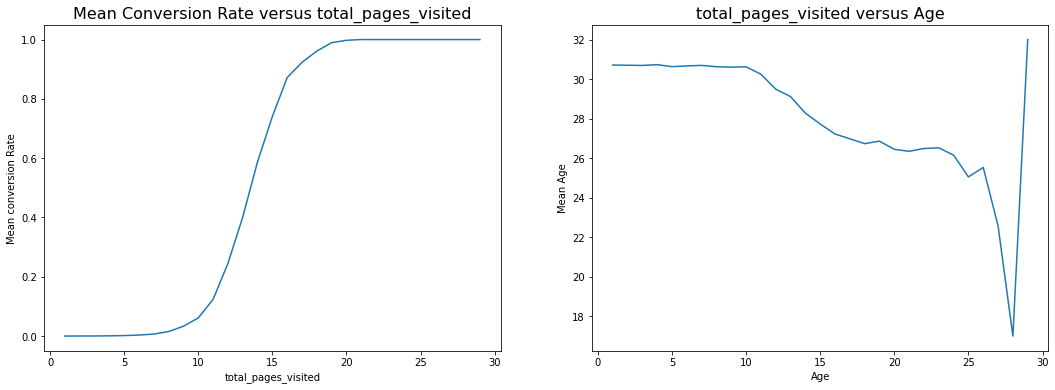

In [ ]:
#mean convertion rate by age and total_pages_visited
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

ax[0].plot(grouped_pages['total_pages_visited'],grouped_pages['converted'])
ax[0].set_title('Mean Conversion Rate versus total_pages_visited', fontsize = 16)
ax[0].set_xlabel('total_pages_visited')
ax[0].set_ylabel('Mean conversion Rate')


ax[1].plot(grouped_pages['total_pages_visited'],grouped_pages['age'])
ax[1].set_title('total_pages_visited versus Age', fontsize = 16)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Mean Age')


plt.show()

Definitely spending more time on the site implies higher probability of conversion!

Focus on your strengths in the challenge. If visualization is your main strength, spend as much time as you wish on that and come up with something great. You might be hired as a great data scientist - visualization. If you have other strengths, spend more time on those. Take-home challenges are pretty open ended by design. By seeing where you spend more time, hiring managers can also understand your strengths, what you like doing the most  and where you would fit best.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Convert categorical features to numeric levels

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical features to numeric levels
for feature in ['country', 'source']:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))
    
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,2,25,1,0,1,0
1,3,23,1,2,5,0
2,3,28,1,2,4,0
3,0,39,1,2,5,0
4,3,30,1,2,6,0


In [ ]:
col = ['country','age',	'new_user',	'source','total_pages_visited']
features= data.loc[:, data.columns.isin(col)]
labels = data['converted']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_train.head()

,country,age,new_user,source,total_pages_visited
105624,3,29,0,2,2
55853,0,47,1,2,3
150261,3,34,0,1,3
226667,3,46,1,0,2
206696,3,48,1,2,2


In [ ]:
#y, X = data.loc[:,'converted'].values, data.loc[:,['country','age',	'new_user',	'source','total_pages_visited']].values

standardize features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
model = XGBClassifier(subsample = 0.7, max_depth = 4)
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)


In [ ]:
# Scale the training and test sets
features = X_train.columns

X_train[features] = scaler.transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

X_train.head()

,country,age,new_user,source,total_pages_visited
105624,0.767805,-0.189226,-1.475205,0.927338,-0.858398
55853,-1.625315,1.988191,0.677872,0.927338,-0.559357
150261,0.767805,0.415612,-1.475205,-0.245374,-0.559357
226667,0.767805,1.867224,0.677872,-1.418086,-0.858398
206696,0.767805,2.109159,0.677872,0.927338,-0.858398


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

#After training the model, we'll check the model training score.
scores = cross_val_score(model, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.99


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.65%


In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

feature importance

In [ ]:
print(model.feature_importances_)

[0.09830225 0.04443675 0.11410331 0.00893769 0.73422   ]


<BarContainer object of 5 artists>

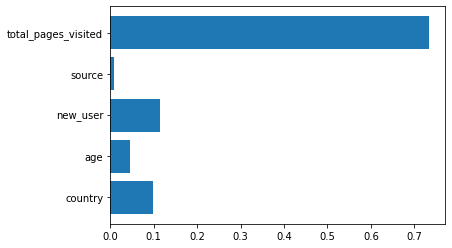

In [ ]:
import matplotlib.pyplot as plt
plt.barh(X_train.columns, model.feature_importances_)

ROC Curve

In [ ]:
#Define a python function to plot the ROC curves
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC: 0.99


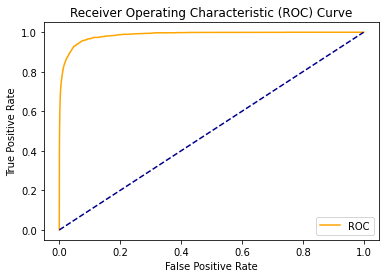

In [ ]:
#predict probabilites for the test data
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs= model.predict_proba(X_test)
probs
#keep probabilities of the positive class only
probs = probs[:, 1]
#compute the AUC score
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

#get the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

#Plot ROC Curve using our defined function
import matplotlib.pyplot as plt
plot_roc_curve(fpr, tpr)

In [ ]:
probs

array([0.0001922 , 0.00015622, 0.00125012, ..., 0.00631039, 0.00033086,
       0.00021955], dtype=float32)

Confusion matrix (cut off is p = 0.05)




In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61205
           1       0.86      0.70      0.77      2035

    accuracy                           0.99     63240
   macro avg       0.92      0.85      0.88     63240
weighted avg       0.99      0.99      0.99     63240



In [ ]:
y_train.head()

105624    0
55853     0
150261    0
226667    0
206696    0
Name: converted, dtype: int64

Probability cutoff

If we cared about the very best possible accuracy or specifically minimizing false positive/false negative, we would also use ROCR and find the best cut-off point. Since in this case that doesn’t appear to be particularly relevant, we are fine with the default 0.5 cutoff value used internally by the random forest to make the prediction. Again, if ROC and cut-off analysis is something you know very well, you should do it no matter what.

In [ ]:
# Make predictions
train_true = y_train.values
test_true = y_test.values
train_pred = model.predict_proba(X_train)
test_pred = model.predict_proba(X_test)

In [ ]:
y_pred=(test_pred[:,1] > 0.2).astype(int)
#y_pred.shape

test_true.shape

print(classification_report(y_true=test_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     61205
           1       0.67      0.82      0.74      2035

    accuracy                           0.98     63240
   macro avg       0.83      0.90      0.86     63240
weighted avg       0.98      0.98      0.98     63240



Convert the standard scalar back

In [ ]:
x = scaler.inverse_transform(X_test)

In [ ]:
print(x)

[[ 3. 24.  0.  2.  1.]
 [ 2. 40.  1.  2.  2.]
 [ 0. 22.  0.  0.  6.]
 ...
 [ 3. 19.  1.  2.  7.]
 [ 0. 35.  1.  2.  7.]
 [ 3. 34.  1.  0.  3.]]
